# Linear Regression

🎯 In this exercise, you will model the sale price of houses (`SalePrice`) according to their living areas (`GrLivArea`)

👇Load the `houses.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

<details>
    <summary>💡Hint</summary>
    The dataset is located in a parent directory, you should use <code>../</code> in order to find it.
</details>

In [121]:
# YOUR CODE HERE
import pandas as pd
house_data=pd.read_csv("../01-Linear-Regression/ML_Houses_dataset.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


ℹ️ You can download a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## 1. Define the feature set and target

🎯 The objective is to model the sale price of houses in \$ (`SalePrice`) according to their living areas in $ft^2$ (`GrLivArea`).

👇 Assign those two variables to X and y. Remember that X is the feature(s), and y the target.

In [122]:
# YOUR CODE HERE

# X=house_data.iloc[:,-1]
# y=house_data.iloc[:,:-1]
# X.shape


y=house_data["SalePrice"]
X=house_data[["GrLivArea"]]
X.shape

(1760, 1)

In [123]:

#GrLivArea: Above grade (ground) living area square feet

👇 In a scatter plot ([doc](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the living areas and the sale prices.

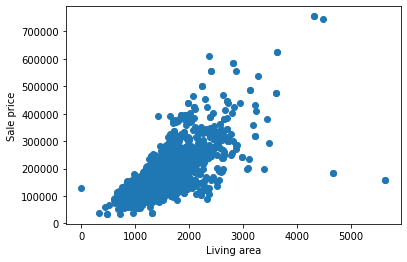

In [124]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(house_data['GrLivArea'], house_data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

In [125]:
sns.regplot(y="SalePrice",
            x="GrLivArea", 
            data=house_data)

NameError: name 'sns' is not defined

In [126]:
round(y.mean())

182290

ℹ️ The scatter plot should hint at the somewhat linear relationship.

### ☑️ Test your code

In [127]:
from nbresult import ChallengeResult

result = ChallengeResult('variables',
                         variable_X = round(X.mean()).item(),
                         variable_y = round(y.mean())
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_variables.py::TestVariables::test_variable_X PASSED           [ 50%]
tests/test_variables.py::TestVariables::test_variable_y PASSED           [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/variables.pickle

git commit -m 'Completed variables step'

git push origin master


## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting sale price from living area. Save the raw output of the cross validation under a new variable `cv_results`.

In [128]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Instanciate model
model=LinearRegression()

# 5-Fold Cross validate model
cv_results=cross_validate(model,X,y,cv=5)

# Scores
cv_results['test_score']

array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [129]:
# YOUR CODE HERE
min_score=cv_results["test_score"].min()
min_score

0.3911751008901019

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [130]:
# YOUR CODE HERE
max_score=cv_results["test_score"].max()
max_score

0.5581065677255257

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [131]:
# YOUR CODE HERE
mean_score=cv_results["test_score"].mean()
mean_score

0.4863112208425962

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [132]:
from nbresult import ChallengeResult

result = ChallengeResult('cv_results',
                         cv_result = cv_results,
                         min_score = min_score,
                         max_score = max_score,
                         mean_score = mean_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_cv_results.py::TestCvResults::test_cv_max PASSED              [ 25%]
tests/test_cv_results.py::TestCvResults::test_cv_mean PASSED             [ 50%]
tests/test_cv_results.py::TestCvResults::test_cv_min PASSED              [ 75%]
tests/test_cv_results.py::TestCvResults::test_cv_results PASSED          [100%]

============================== 4 passed in 0.49s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master


👇 Plot the evolution of **total computational time** and **mean score** as Kfolds increases from 2 until 40.

In [133]:
# YOUR CODE HERE
from sklearn.model_selection import KFold
cv_results


{'fit_time': array([0.02005315, 0.00225472, 0.002038  , 0.00180101, 0.00167489]),
 'score_time': array([0.00261688, 0.00120807, 0.0011549 , 0.00098205, 0.00097895]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [134]:
# YOUR CODE HERE

ℹ️ You will notice that while the score stabilizes, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

👇 Go ahead and train the model. Save the trained model under the variable `model`.

In [135]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X = house_data[['GrLivArea']]
y = house_data['SalePrice']

#split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [136]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4861505678173794

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [137]:
# YOUR CODE HERE
slope=model.coef_
slope

array([97.35775797])

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [138]:
# YOUR CODE HERE
intercept=model.intercept_
intercept

30853.27166230447

### ☑️ Test your code

In [139]:
from nbresult import ChallengeResult

result = ChallengeResult('trained_model',
                         model = model,
                         slope = slope,
                         intercept = intercept
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_trained_model.py::TestTrainedModel::test_intercept PASSED     [ 50%]
tests/test_trained_model.py::TestTrainedModel::test_slope PASSED         [100%]

============================== 2 passed in 1.95s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master


## 4. Visualize the model

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

In [140]:
# YOUR CODE HERE
# A Linear Regression (OLS) maps a linear relationship between the input X and the output y. It optimizes slope a
# and intercept b by reducing the residuals between the actual y and the predicted y.

y_fit_line=slope*X+intercept


# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [141]:
# YOUR CODE HERE
import numpy as np
prediction=model.predict([[1500]])
prediction

array([176889.90862456])

In [143]:
model.predict(X_test)

array([194414.30506003, 103579.51686951, 170074.86556632, 156834.21048175,
       156834.21048175, 145540.71055666, 161702.09838049,  89754.71523708,
       214762.07647677, 197335.03779928, 113120.57715104, 160144.37425289,
       237349.07632694, 152550.46913085, 126945.37878347, 161117.95183264,
       132105.33995614, 182341.94307115, 125387.65465587, 330909.88174076,
       127237.45205739, 132202.69771411, 119643.54693536, 126945.37878347,
       179323.85257393, 191104.14128889, 158391.93460934, 233746.83928187,
       148850.87432781, 141256.96920577, 217293.37818412, 115457.16334244,
       228976.3091411 , 254289.32621456, 210186.26185196, 205610.44722714,
       152355.7536149 , 174163.89140127, 208433.82220841, 165791.12421543,
       230047.24447882, 234623.05910364, 180881.57670153, 128697.81842702,
       160144.37425289, 183802.30944078, 171243.15866202, 234330.98582972,
       176889.90862456, 202981.78776182, 196556.17573548, 113412.65042497,
       139699.24507817, 2

### ☑️ Test your code

In [142]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/01-Fundamentals-of-Machine-Learning/01-Linear-Regression
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁